In [1]:
!pip install pandas

You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pandas as pd

In [4]:
!pip install chakin

You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import chakin
chakin.search(lang='English')

                   Name  Dimension                     Corpus VocabularySize  \
2          fastText(en)        300                  Wikipedia           2.5M   
11         GloVe.6B.50d         50  Wikipedia+Gigaword 5 (6B)           400K   
12        GloVe.6B.100d        100  Wikipedia+Gigaword 5 (6B)           400K   
13        GloVe.6B.200d        200  Wikipedia+Gigaword 5 (6B)           400K   
14        GloVe.6B.300d        300  Wikipedia+Gigaword 5 (6B)           400K   
15       GloVe.42B.300d        300          Common Crawl(42B)           1.9M   
16      GloVe.840B.300d        300         Common Crawl(840B)           2.2M   
17    GloVe.Twitter.25d         25               Twitter(27B)           1.2M   
18    GloVe.Twitter.50d         50               Twitter(27B)           1.2M   
19   GloVe.Twitter.100d        100               Twitter(27B)           1.2M   
20   GloVe.Twitter.200d        200               Twitter(27B)           1.2M   
21  word2vec.GoogleNews        300      

In [17]:
chakin.download(number=16, save_dir='embeddings/')

Test: 100% ||                                      | Time:  0:03:26  10.1 MiB/s


'embeddings/glove.840B.300d.zip'

In [7]:
chakin.download(number=21, save_dir='embeddings/')

Test: 100% ||                                      | Time:  0:01:24  18.6 MiB/s


'Glove_Embedding/GoogleNews-vectors-negative300.bin.gz'

In [1]:
import pandas as pd
import numpy as np
import operator 
import re
import gc
import keras
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

Using TensorFlow backend.


In [3]:
!pip install gensim

  Using cached https://files.pythonhosted.org/packages/40/3d/89b27573f56abcd1b8c9598b240f53c45a3c79aa0924a24588e99716043b/gensim-3.8.0-cp36-cp36m-manylinux1_x86_64.whl
You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [61]:
4+4

8

In [62]:
from gensim.models.keyedvectors import KeyedVectors

model = KeyedVectors.load_word2vec_format('embeddings/GoogleNews-vectors-negative300.bin', binary=True)
model.save_word2vec_format('embeddings/GoogleNews-vectors-negative300.txt', binary=False)

In [2]:
train = pd.read_csv("data/train_F3WbcTw.csv")
test = pd.read_csv("data/test_tOlRoBf.csv")
df = pd.concat([train ,test])

print("Number of texts: ", df.shape[0])

Number of texts:  8203


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


In [5]:
def load_embed(file):
    def get_coefs(word,*arr): 
        return word, np.asarray(arr, dtype='float32')
    
    if file == 'embeddings/cc.en.300.vec':
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file) if len(o)>100)
    else:
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file, encoding='latin'))
        
    return embeddings_index

In [6]:
glove = 'embeddings/glove.840B.300d.txt'
paragram =  'embeddings/GoogleNews-vectors-negative300.txt'
wiki_news = 'embeddings/cc.en.300.vec'

In [ ]:
print("Extracting GloVe embedding")
embed_glove = load_embed(glove)

Extracting GloVe embedding


In [ ]:
print("Extracting FastText embedding")
embed_fasttext = load_embed(wiki_news)

Extracting FastText embedding


In [ ]:
print("Extracting Word2Vec embedding")
embed_paragram = load_embed(paragram)

Extracting Word2Vec embedding


In [7]:
def build_vocab(texts):
    sentences = texts.apply(lambda x: x.split()).values
    vocab = {}
    for sentence in sentences:
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

In [8]:
def check_coverage(vocab, embeddings_index):
    known_words = {}
    unknown_words = {}
    nb_known_words = 0
    nb_unknown_words = 0
    for word in vocab.keys():
        try:
            known_words[word] = embeddings_index[word]
            nb_known_words += vocab[word]
        except:
            unknown_words[word] = vocab[word]
            nb_unknown_words += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(known_words) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(nb_known_words / (nb_known_words + nb_unknown_words)))
    unknown_words = sorted(unknown_words.items(), key=operator.itemgetter(1))[::-1]

    return unknown_words

In [9]:
vocab = build_vocab(df['text'])

In [ ]:
print("Glove : ")
oov_glove = check_coverage(vocab, embed_glove)
print("Paragram : ")
oov_paragram = check_coverage(vocab, embed_paragram)
print("FastText : ")
oov_fasttext = check_coverage(vocab, embed_fasttext)

Glove : 
Found embeddings for 39.32% of vocab
Found embeddings for  87.84% of all text
Paragram : 
Found embeddings for 30.35% of vocab
Found embeddings for  73.71% of all text
FastText : 
Found embeddings for 42.50% of vocab
Found embeddings for  90.54% of all text


In [10]:
df['lowered_text'] = df['text'].apply(lambda x: x.lower())

In [11]:
vocab_low = build_vocab(df['lowered_text'])

In [ ]:
print("Glove : ")
oov_glove = check_coverage(vocab_low, embed_glove)
print("Paragram : ")
oov_paragram = check_coverage(vocab_low, embed_paragram)
print("FastText : ")
oov_fasttext = check_coverage(vocab_low, embed_fasttext)

Glove : 
Found embeddings for 34.04% of vocab
Found embeddings for  87.22% of all text
Paragram : 
Found embeddings for 23.18% of vocab
Found embeddings for  72.21% of all text
FastText : 
Found embeddings for 37.10% of vocab
Found embeddings for  89.61% of all text


In [12]:
def add_lower(embedding, vocab):
    count = 0
    for word in vocab:
        if word in embedding and word.lower() not in embedding:  
            embedding[word.lower()] = embedding[word]
            count += 1
    print(f"Added {count} words to embedding")

In [ ]:
print("Glove : ")
add_lower(embed_glove, vocab)
print("Paragram : ")
add_lower(embed_paragram, vocab)
print("FastText : ")
add_lower(embed_fasttext, vocab)

Glove : 
Added 2426 words to embedding
Paragram : 
Added 4226 words to embedding
FastText : 
Added 2989 words to embedding


In [ ]:
print("Glove : ")
oov_glove = check_coverage(vocab_low, embed_glove)
print("Paragram : ")
oov_paragram = check_coverage(vocab_low, embed_paragram)
print("FastText : ")
oov_fasttext = check_coverage(vocab_low, embed_fasttext)

Glove : 
Found embeddings for 36.19% of vocab
Found embeddings for  88.00% of all text
Paragram : 
Found embeddings for 26.92% of vocab
Found embeddings for  82.98% of all text
FastText : 
Found embeddings for 39.75% of vocab
Found embeddings for  90.82% of all text


In [ ]:
oov_glove[:10]

[('–', 2384),
 ('i’m', 2173),
 ("crohn's", 2142),
 ('it’s', 1939),
 ('ocrevus', 1348),
 ('however,', 1322),
 ('don’t', 1168),
 ('i’ve', 1092),
 ('entyvio', 926),
 ('cancer,', 754)]

In [13]:
contraction_mapping = {
        'didn\'t': 'did not',
        'don\'t': 'do not',
        "aren't": "are not",
        "can't": "cannot",
        "cant": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "didnt": "did not",
        "doesn't": "does not",
        "doesnt": "does not",
        "don't": "do not",
        "dont" : "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he had",
        "he'd've": "he would have",
        "he'll": "he will",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i had",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'm": "i am",
        "im": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'll": "it will",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she had",
        "she'd've": "she would have",
        "she'll": "she will",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "that's": "that is",
        "there's": "there is",
        "they'd": "they had",
        "they'd've": "they would have",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we had",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who's": "who is",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have"
        }


In [14]:
def known_contractions(embed):
    known = []
    for contract in contraction_mapping:
        if contract in embed:
            known.append(contract)
    return known

In [15]:
print("- Known Contractions -")
print("   Glove :")
print(known_contractions(embed_glove))
print("   Paragram :")
print(known_contractions(embed_paragram))
print("   FastText :")
print(known_contractions(embed_fasttext))

- Known Contractions -
   Glove :
["didn't", "don't", "can't", 'cant', "'cause", 'didnt', "doesn't", 'doesnt', 'dont', 'im', "it's", "ma'am", "that's", "you'll", "you're"]
   Paragram :


NameError: name 'embed_paragram' is not defined

In [16]:
def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

In [17]:
df['treated_text'] = df['lowered_text'].apply(lambda x: clean_contractions(x, contraction_mapping))

In [ ]:
vocab = build_vocab(df['treated_text'])
print("Glove : ")
oov_glove = check_coverage(vocab, embed_glove)
print("Paragram : ")
oov_paragram = check_coverage(vocab, embed_paragram)
print("FastText : ")
oov_fasttext = check_coverage(vocab, embed_fasttext)

Glove : 
Found embeddings for 36.33% of vocab
Found embeddings for  88.60% of all text
Paragram : 
Found embeddings for 27.00% of vocab
Found embeddings for  83.55% of all text
FastText : 
Found embeddings for 39.87% of vocab
Found embeddings for  90.92% of all text


In [18]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'+"≥®🙂≥"

In [19]:
def unknown_punct(embed, punct):
    unknown = ''
    for p in punct:
        if p not in embed:
            unknown += p
            unknown += ' '
    return unknown

In [ ]:
print("Glove :")
print(unknown_punct(embed_glove, punct))
print("Paragram :")
print(unknown_punct(embed_paragram, punct))
print("FastText :")
print(unknown_punct(embed_fasttext, punct))

Glove :
“ ” ’ ∞ θ ÷ α • à − β ∅ ³ π ‘ ₹ ´ ° £ € × ™ √ ² — – ≥ ® 🙂 ≥ 
Paragram :
/ - ' ? ! . , ' ( ) - / : ; < [ \ ] { | } " " “ ” ’ ∞ θ ÷ α • à − β ∅ ³ π ‘ ₹ ´ ° £ € \ × ™ √ ² — – ≥ ® 🙂 ≥ 
FastText :
_ ` 🙂 


In [20]:
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi',}

In [21]:
def clean_special_chars(text, punct, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}  # Other special characters that I have to deal with in last
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text

In [22]:
df['treated_text'] = df['treated_text'].apply(lambda x: clean_special_chars(x, punct, punct_mapping))

In [ ]:
vocab = build_vocab(df['treated_text'])
print("Glove : ")
oov_glove = check_coverage(vocab, embed_glove)
print("Paragram : ")
oov_paragram = check_coverage(vocab, embed_paragram)
print("FastText : ")
oov_fasttext = check_coverage(vocab, embed_fasttext)

Glove : 
Found embeddings for 81.39% of vocab
Found embeddings for  98.86% of all text
Paragram : 
Found embeddings for 69.53% of vocab
Found embeddings for  81.56% of all text
FastText : 
Found embeddings for 81.52% of vocab
Found embeddings for  99.30% of all text


In [ ]:
5+5

10

In [23]:
mispell_dict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ', 'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can', 'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization', 'demonetisation': 'demonetization'}

In [24]:
def correct_spelling(x, dic):
    for word in dic.keys():
        x = x.replace(word, dic[word])
    return x

In [25]:
df['treated_text'] = df['treated_text'].apply(lambda x: correct_spelling(x, mispell_dict))

In [37]:
vocab = build_vocab(df['treated_text'])
print("Glove : ")
oov_glove = check_coverage(vocab, embed_glove)
print("Paragram : ")
oov_paragram = check_coverage(vocab, embed_paragram)
print("FastText : ")
oov_fasttext = check_coverage(vocab, embed_fasttext)

Glove : 
Found embeddings for 81.38% of vocab
Found embeddings for  98.86% of all text
Paragram : 
Found embeddings for 69.54% of vocab
Found embeddings for  81.56% of all text
FastText : 
Found embeddings for 81.51% of vocab
Found embeddings for  99.30% of all text


In [26]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [27]:
df['treated_text'] = df['treated_text'].apply(deEmojify)

In [40]:
vocab = build_vocab(df['treated_text'])
print("Glove : ")
oov_glove = check_coverage(vocab, embed_glove)
print("Paragram : ")
oov_paragram = check_coverage(vocab, embed_paragram)
print("FastText : ")
oov_fasttext = check_coverage(vocab, embed_fasttext)

Glove : 
Found embeddings for 82.09% of vocab
Found embeddings for  98.97% of all text
Paragram : 
Found embeddings for 70.08% of vocab
Found embeddings for  81.65% of all text
FastText : 
Found embeddings for 81.92% of vocab
Found embeddings for  99.32% of all text


In [93]:
len_voc = 95000
max_len = 60

In [84]:
from imblearn.keras import BalancedBatchGenerator
from imblearn.under_sampling import NearMiss

In [94]:
# Class count
count_class_0, count_class_1, count_class_2 = train.sentiment.value_counts()

# Divide by class
df_class_0 = train[train['sentiment'] == 0]
df_class_1 = train[train['sentiment'] == 1]
df_class_2 = train[train['sentiment'] == 2]

Random under-sampling:
1    837
2    837
0    617
Name: sentiment, dtype: int64


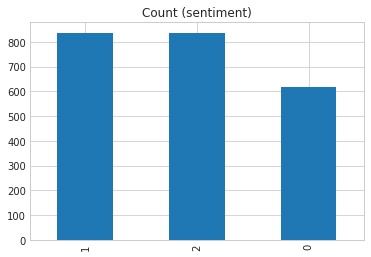

In [95]:
df_class_2_under = df_class_2.sample(count_class_1)
df_test_under = pd.concat([df_class_0, df_class_2_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.sentiment.value_counts())

df_test_under.sentiment.value_counts().plot(kind='bar', title='Count (sentiment)'); 

In [96]:
train = df_test_under

In [163]:
# Lowering
train['treated_text'] = train['text'].apply(lambda x: x.lower())
# Contractions
train['treated_text'] = train['treated_text'].apply(lambda x: clean_contractions(x, contraction_mapping))
# Special characters
train['treated_text'] = train['treated_text'].apply(lambda x: clean_special_chars(x, punct, punct_mapping))

In [164]:
#removing Emoji's
train['treated_text'] = train['treated_text'].apply(deEmojify)

In [165]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [166]:
def make_data(X):
    t = Tokenizer(num_words=len_voc)
    t.fit_on_texts(X)
    X = t.texts_to_sequences(X)
    X = pad_sequences(X, maxlen=max_len)
    return X, t.word_index

In [167]:
X, word_index = make_data(train['text'])

In [168]:
def make_treated_data(X):
    t = Tokenizer(num_words=len_voc, filters='')
    t.fit_on_texts(X)
    X = t.texts_to_sequences(X)
    X = pad_sequences(X, maxlen=max_len)
    return X, t.word_index

In [169]:
X_treated, word_index_treated = make_data(train['treated_text'])

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
y = train['sentiment'].values

In [172]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
num_classes = np.max(y) + 1
y = to_categorical(y, num_classes)

In [173]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=420)

In [174]:
X_t_train, X_t_val, _, _ = train_test_split(X_treated, y, test_size=0.1, random_state=420)


In [175]:
print(f"Training on {X_train.shape[0]} texts")

Training on 2061 texts


In [176]:
def make_embed_matrix(embeddings_index, word_index, len_voc):
    all_embs = np.stack(embeddings_index.values())
    emb_mean,emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]
    word_index = word_index
    embedding_matrix = np.random.normal(emb_mean, emb_std, (len_voc, embed_size))
    
    for word, i in word_index.items():
        if i >= len_voc:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None: 
            embedding_matrix[i] = embedding_vector
    
    return embedding_matrix

In [177]:
embedding = make_embed_matrix(embed_glove, word_index, len_voc)

del word_index
gc.collect()

4542

In [178]:
embedding_treated = make_embed_matrix(embed_glove, word_index_treated, len_voc)
del word_index_treated
gc.collect()

0

In [179]:
from keras import backend as K

In [180]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [181]:
from keras.models import Model
from keras.layers import Dense, Embedding, Bidirectional, CuDNNGRU, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, Input, Dropout
from keras.optimizers import Adam

In [321]:
def make_model(embedding_matrix, embed_size=300, loss='binary_crossentropy'):
    inp    = Input(shape=(max_len,))
    x      = Embedding(len_voc, embed_size, weights=[embedding_matrix], trainable=False)(inp)
    x      = Bidirectional(CuDNNGRU(128, return_sequences=True))(x)
    x      = Bidirectional(CuDNNGRU(64, return_sequences=True))(x)
    x      = Bidirectional(CuDNNGRU(32, return_sequences=True))(x)
    avg_pl = GlobalAveragePooling1D()(x)
    max_pl = GlobalMaxPooling1D()(x)
    concat = concatenate([avg_pl, max_pl])
    dense  = Dense(32, activation="relu")(concat)
    dense  = Dense(32, activation="relu")(concat)
    dense  = Dense(32, activation="relu")(concat)
    drop   = Dropout(0.5)(concat)
    output = Dense(3, activation="softmax")(concat)
    
    model  = Model(inputs=inp, outputs=output)
    model.compile(loss=loss, optimizer=Adam(lr=0.0001), metrics=['accuracy',f1])
    return model

In [322]:
model = make_model(embedding)

In [323]:
model_treated = make_model(embedding_treated)

In [324]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 60)           0                                            
__________________________________________________________________________________________________
embedding_15 (Embedding)        (None, 60, 300)      28500000    input_15[0][0]                   
__________________________________________________________________________________________________
bidirectional_29 (Bidirectional (None, 60, 256)      330240      embedding_15[0][0]               
__________________________________________________________________________________________________
bidirectional_30 (Bidirectional (None, 60, 128)      123648      bidirectional_29[0][0]           
__________________________________________________________________________________________________
bidirectio

In [325]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [326]:
checkpoints = ModelCheckpoint('weights.hdf5', monitor="val_f1", mode="macro", verbose=True, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_f1', factor=0.1, patience=2, verbose=1, min_lr=0.000001)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/callbacks.py:407: RuntimeWarning: ModelCheckpoint mode macro is unknown, fallback to auto mode.
  RuntimeWarning)


In [327]:
checkpoints_treated = ModelCheckpoint('treated_weights.hdf5', monitor="val_f1", mode="macro", verbose=True, save_best_only=True)
reduce_lr_treated = ReduceLROnPlateau(monitor='val_f1', factor=0.1, patience=2, verbose=1, min_lr=0.000001)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/callbacks.py:407: RuntimeWarning: ModelCheckpoint mode macro is unknown, fallback to auto mode.
  RuntimeWarning)


In [328]:
es = keras.callbacks.EarlyStopping(monitor='val_f1',
                              min_delta=0,
                              patience=3,
                              verbose=0, mode='macro')

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/callbacks.py:511: RuntimeWarning: EarlyStopping mode macro is unknown, fallback to auto mode.
  RuntimeWarning)


In [329]:
epochs = 200
batch_size = 512

In [330]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=[X_val, y_val], callbacks=[checkpoints, reduce_lr,es])

Train on 2061 samples, validate on 230 samples
Epoch 1/200
2061/2061 [==============================] - 6s 3ms/step - loss: 0.6366 - acc: 0.6636 - f1: 0.0141 - val_loss: 0.6336 - val_acc: 0.6667 - val_f1: 0.0000e+00

Epoch 00001: val_f1 improved from inf to 0.00000, saving model to weights.hdf5
Epoch 2/200
2061/2061 [==============================] - 0s 99us/step - loss: 0.6235 - acc: 0.6689 - f1: 0.0244 - val_loss: 0.6324 - val_acc: 0.6638 - val_f1: 0.0413

Epoch 00002: val_f1 did not improve from 0.00000
Epoch 3/200
2061/2061 [==============================] - 0s 94us/step - loss: 0.6210 - acc: 0.6723 - f1: 0.0661 - val_loss: 0.6292 - val_acc: 0.6638 - val_f1: 0.0085

Epoch 00003: val_f1 did not improve from 0.00000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 4/200
2061/2061 [==============================] - 0s 95us/step - loss: 0.6169 - acc: 0.6694 - f1: 0.0322 - val_loss: 0.6290 - val_acc: 0.6638 - val_f1: 0.0085

Epoch 00004: val_f1 did 

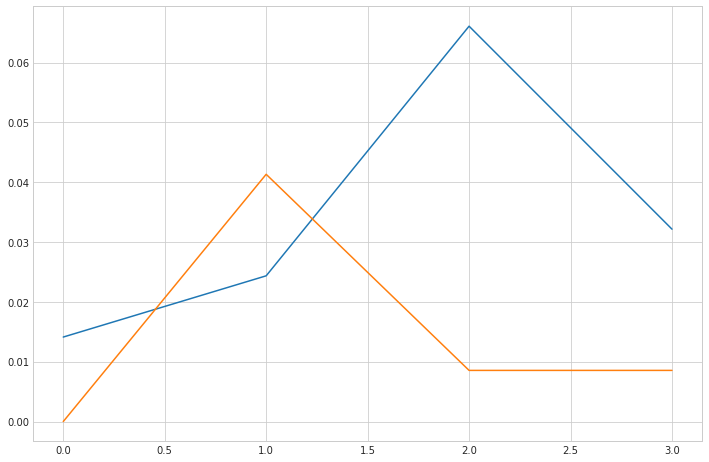

In [331]:
plt.figure(figsize=(12,8))
plt.plot(history.history['f1'], label='Train accuracy')
plt.plot(history.history['val_f1'], label='Test accuracy')
plt.show()

In [332]:
history = model_treated.fit(X_t_train, y_train, batch_size=batch_size, epochs=epochs, 
                            validation_data=[X_t_val, y_val], callbacks=[checkpoints_treated, reduce_lr_treated,es])

Train on 2061 samples, validate on 230 samples
Epoch 1/200
2061/2061 [==============================] - 6s 3ms/step - loss: 0.6765 - acc: 0.6351 - f1: 0.1139 - val_loss: 0.6392 - val_acc: 0.6667 - val_f1: 0.0000e+00

Epoch 00001: val_f1 improved from inf to 0.00000, saving model to treated_weights.hdf5
Epoch 2/200
2061/2061 [==============================] - 0s 95us/step - loss: 0.6345 - acc: 0.6663 - f1: 9.6663e-04 - val_loss: 0.6305 - val_acc: 0.6667 - val_f1: 0.0000e+00

Epoch 00002: val_f1 did not improve from 0.00000
Epoch 3/200
2061/2061 [==============================] - 0s 94us/step - loss: 0.6274 - acc: 0.6667 - f1: 0.0000e+00 - val_loss: 0.6310 - val_acc: 0.6667 - val_f1: 0.0000e+00

Epoch 00003: val_f1 did not improve from 0.00000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 4/200
2061/2061 [==============================] - 0s 97us/step - loss: 0.6265 - acc: 0.6663 - f1: 0.0039 - val_loss: 0.6308 - val_acc: 0.6667 - val_f1: 0.0000e+

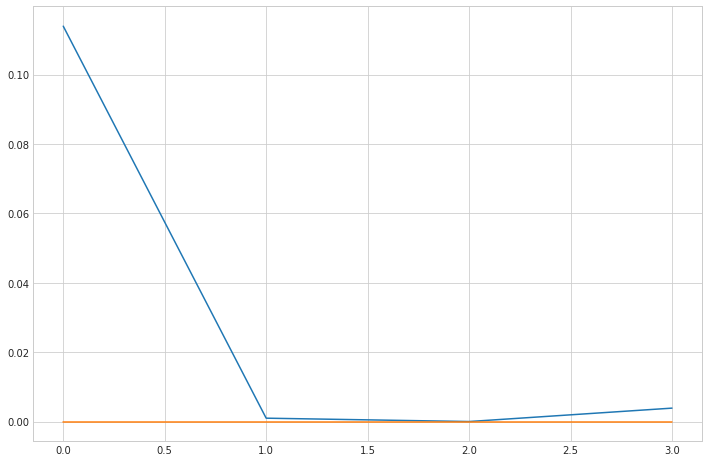

In [333]:
plt.figure(figsize=(12,8))
plt.plot(history.history['f1'], label='Train Accuracy')
plt.plot(history.history['val_f1'], label='Test Accuracy')
plt.show()

In [334]:
model.load_weights('weights.hdf5')
model_treated.load_weights('treated_weights.hdf5')

In [335]:
pred_val = model.predict(X_val, batch_size=512, verbose=1)
pred_t_val = model_treated.predict(X_t_val, batch_size=512, verbose=1)

230/230 [==============================] - 2s 8ms/step


In [336]:
from sklearn.metrics import f1_score

In [337]:
def tweak_threshold(pred, truth):
    thresholds = []
    scores = []
    for thresh in np.arange(0.1, 0.501, 0.01):
        thresh = np.round(thresh, 2)
        thresholds.append(thresh)
        score = f1_score(truth, (pred>thresh).astype(int),average = 'macro')
        scores.append(score)
    return np.max(scores), thresholds[np.argmax(scores)]

In [338]:
score_val, threshold_val = tweak_threshold(pred_val, y_val)

print(f"Scored {round(score_val, 4)} for threshold {threshold_val} with untreated texts on validation data")

Scored 0.499 for threshold 0.19 with untreated texts on validation data


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predic

In [339]:
score_t_val, threshold_t_val = tweak_threshold(pred_t_val, y_val)

print(f"Scored {round(score_t_val, 4)} for threshold {threshold_t_val} with treated texts on validation data")

Scored 0.4995 for threshold 0.22 with treated texts on validation data


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predic

In [340]:
# Lowering
test['treated_text'] = test['text'].apply(lambda x: x.lower())
# Contractions
test['treated_text'] = test['treated_text'].apply(lambda x: clean_contractions(x, contraction_mapping))
# Special characters
test['treated_text'] = test['treated_text'].apply(lambda x: clean_special_chars(x, punct, punct_mapping))

In [341]:
#removing Emoji's
test['treated_text'] = test['treated_text'].apply(deEmojify)

In [342]:
from keras.utils import np_utils

In [343]:
X_test, word_index_treated = make_data(test['treated_text'])

In [344]:
pred_val = model.predict(X_test, batch_size=512, verbose=1)

2924/2924 [==============================] - 0s 31us/step


In [345]:
pred_val

array([[0.34129524, 0.27110234, 0.3876024 ],
       [0.3462859 , 0.32006624, 0.33364782],
       [0.2180683 , 0.3930707 , 0.38886103],
       ...,
       [0.22358301, 0.4310173 , 0.34539968],
       [0.28449893, 0.34708914, 0.3684119 ],
       [0.21464142, 0.4191706 , 0.36618796]], dtype=float32)

In [346]:
test['sentiment'] = pred_val.argmax(axis=-1)

In [347]:
test['sentiment'].value_counts()

1    1898
2     954
0      72
Name: sentiment, dtype: int64

In [348]:
test[["unique_hash","sentiment"]].to_csv("keras_pucca_7.csv",index=False)

In [250]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))

In [251]:
model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy',f1])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                610       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 11        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


In [253]:
 history = model.fit(X_train, y_train,
                   epochs=100,
                   verbose=False,validation_data=(X_val, y_val),batch_size=10)

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [254]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

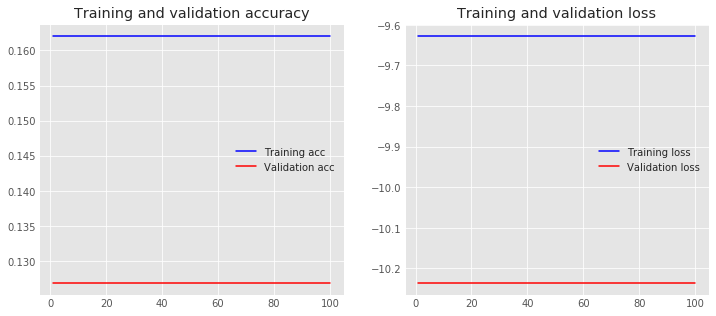

In [255]:
plot_history(history)

In [256]:
prediction = model.predict_classes(X_test)

In [257]:
test['sentiment'] = prediction

In [258]:
test['sentiment'].value_counts()

1    2924
Name: sentiment, dtype: int64